In [1]:
import numpy as np
import pandas as pd


In [2]:
column_names=['user_id','item_id','rating','timestamp']

In [8]:
#get data

data=pd.read_csv('Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data',sep='\t',names=column_names)

In [10]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [16]:
movietitles=pd.read_csv('Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')

In [17]:
movietitles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [23]:
#merge movietitles dataframe and data data frame
new_df=pd.merge(data,movietitles,on='item_id')

In [24]:
new_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [28]:
#get average rating of each movie

new_df.groupby('title').rating.mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [31]:
#create a dataframe of ratings average

films_df=pd.DataFrame(new_df.groupby('title').rating.mean().sort_values(ascending=False))

In [32]:
films_df.head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [42]:
new_df.groupby('title').rating.count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [43]:
films_df['number of ratings']=new_df.groupby('title').rating.count().sort_values(ascending=False)

In [51]:
films_df.head()

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


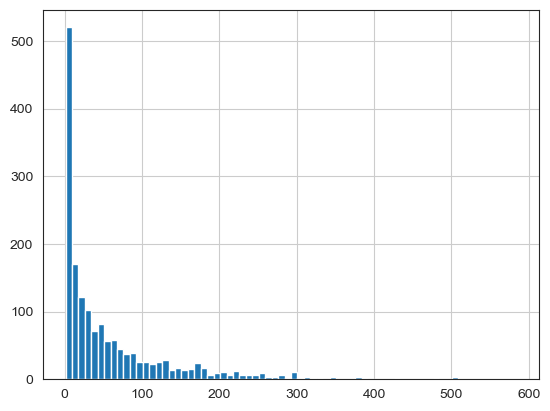

In [54]:
films_df['number of ratings'].hist(bins=70);

<Axes: >

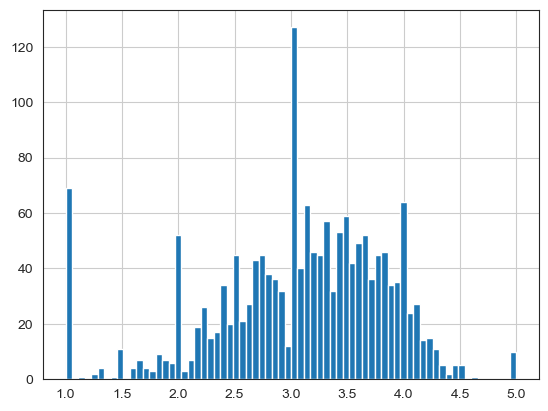

In [56]:
films_df['rating'].hist(bins=70)

<Figure size 1000x1000 with 0 Axes>

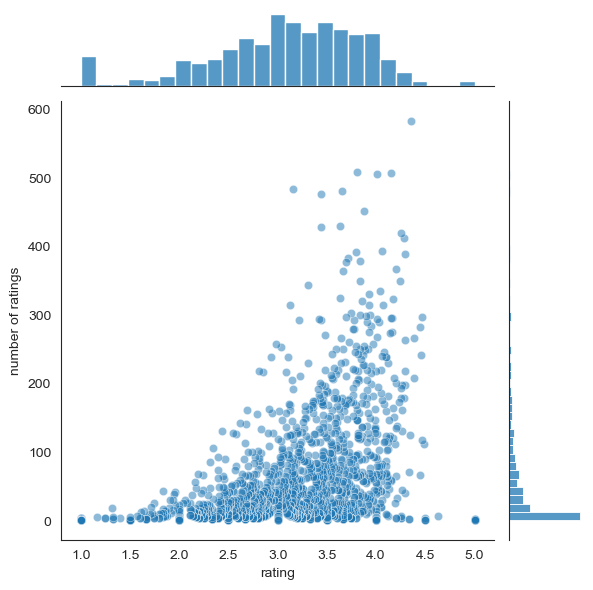

In [62]:
plt.figure(figsize=(10,10))
sns.jointplot(x='rating',y='number of ratings',data=films_df,alpha=0.5);

In [64]:
new_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [67]:
moviemat=new_df.pivot_table(index='user_id',columns='title',values='rating')

In [68]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
films_df.sort_values('number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [75]:
starwars_user_rating=moviemat['Star Wars (1977)']
liarliar_user_rating=moviemat['Liar Liar (1997)']

In [78]:
starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [79]:
liarliar_user_rating.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [84]:
similar_to_starwars=moviemat.corrwith(starwars_user_rating)

C:\Users\udayk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\udayk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [85]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_rating)

C:\Users\udayk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\udayk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [86]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [89]:
starwars_corr_df=pd.DataFrame(similar_to_starwars,columns=['correlation'])
starwars_corr_df

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [91]:
starwars_corr_df.dropna(inplace=True)

In [93]:
starwars_corr_df

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [97]:
starwars_corr_df.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [98]:
films_df.head()

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [102]:
corr_starwars=starwars_corr_df.join(films_df['number of ratings'])
corr_starwars

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [105]:
top_corr_starwars=corr_starwars[corr_starwars['number of ratings']>100]

In [112]:
top_corr_starwars.sort_values(by=['number of ratings'],ascending=False).head(10)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
"English Patient, The (1996)",0.049013,481
Scream (1996),0.134648,478
Toy Story (1995),0.180020,452
Air Force One (1997),0.113164,431


In [119]:
#now for liar liar movie'

liarliar=pd.DataFrame(similar_to_liarliar,columns=['correlation'])
liarliar.dropna(inplace=True)
liarliar

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [127]:
liarliar_df=liarliar.join(films_df['number of ratings'])
liarliar_df=liarliar_df[liarliar_df['number of ratings']>100]

In [128]:
liarliar_df.sort_values('number of ratings',ascending=False).head(10)

,correlation,number of ratings
title,,
Star Wars (1977),0.150292,584
Contact (1997),0.022878,509
Fargo (1996),-0.110496,508
Return of the Jedi (1983),0.227837,507
Liar Liar (1997),1.000000,485
"English Patient, The (1996)",0.010082,481
Scream (1996),0.172144,478
Toy Story (1995),0.342576,452
Air Force One (1997),0.185401,431
